<h1> Importing the libraries</h1>

> Indented block



In [3]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
from skimage import filters
import cv2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

<h1> Data Collection </h1>

In [4]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [5]:
categories = ['dogs', 'panda', 'cats']

In [6]:
#path = '/content/drive/MyDrive/animals'
path = '/content/drive/MyDrive/animals'

In [7]:
path

'/content/drive/MyDrive/animals'

In [8]:
os.listdir(path)

['cats', 'dogs', 'panda']

<h1> Displaying some of the images in the dataset </h1>

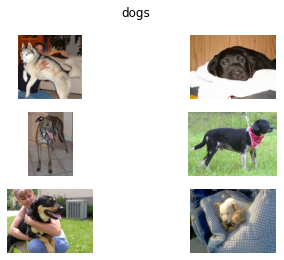

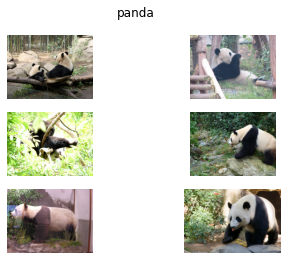

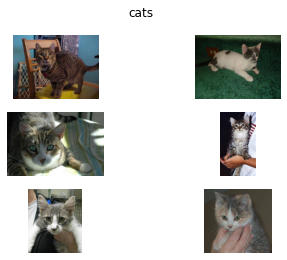

In [9]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+ '/' +category)[:6]):
        img = plt.imread(path+'/'+category+'/'+v)
        plt.subplot(3, 2, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

<h1> Checking for the shapes of the images</h1>

In [10]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+'/'+category):
        shape0.append(plt.imread(path+'/'+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+'/'+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

dogs  => height min :  50 width min :  59
dogs  => height max :  500 width max :  500
panda  => height min :  87 width min :  78
panda  => height max :  1200 width max :  1600
cats  => height min :  32 width min :  55
cats  => height max :  500 width max :  500


<h1> Reshaping and Resizing the dataset </h1>

In [11]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+'/'+category):
        imagePaths.append([path+'/'+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

[['/content/drive/MyDrive/animals/cats/cats_00013.jpg', 2], ['/content/drive/MyDrive/animals/cats/cats_00489.jpg', 2], ['/content/drive/MyDrive/animals/dogs/dogs_00882.jpg', 0], ['/content/drive/MyDrive/animals/dogs/dogs_00231.jpg', 0], ['/content/drive/MyDrive/animals/panda/panda_00285.jpg', 1], ['/content/drive/MyDrive/animals/panda/panda_00466.jpg', 1], ['/content/drive/MyDrive/animals/panda/panda_00197.jpg', 1], ['/content/drive/MyDrive/animals/panda/panda_00851.jpg', 1], ['/content/drive/MyDrive/animals/panda/panda_00961.jpg', 1], ['/content/drive/MyDrive/animals/cats/cats_00815.jpg', 2]]


<h1> Feature Extraction </h1>

In [12]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

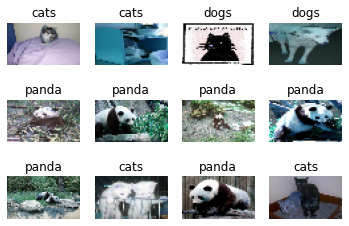

In [13]:
# Let's check everything is ok
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

<h1>Split dataset into train set and test set</h1>

In [14]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=101)

<h1> Label Encoding </h1>

In [15]:
# Preprocess class labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2252, 32, 55, 3)
(751, 32, 55, 3)
(2252,)
(751,)


In [16]:
X_train = X_train.reshape(2252,32*55*3)
X_test = X_test.reshape(751,32*55*3)

<h1>Fitting the model on training data</h1>

In [17]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

<h1> Evaluating model performance on test data</h1>

In [18]:
pred = model.predict(X_test)
print('Accuracy :', round(accuracy_score(y_test, pred)))
print('_________________________________________________________')
print(confusion_matrix(y_test, pred))
print('_________________________________________________________')
print(classification_report(y_test, pred))

Accuracy : 1
_________________________________________________________
[[141  23  83]
 [ 37 198  14]
 [ 80  17 158]]
_________________________________________________________
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       247
           1       0.83      0.80      0.81       249
           2       0.62      0.62      0.62       255

    accuracy                           0.66       751
   macro avg       0.67      0.66      0.66       751
weighted avg       0.67      0.66      0.66       751

